In [4]:
using PyPlot

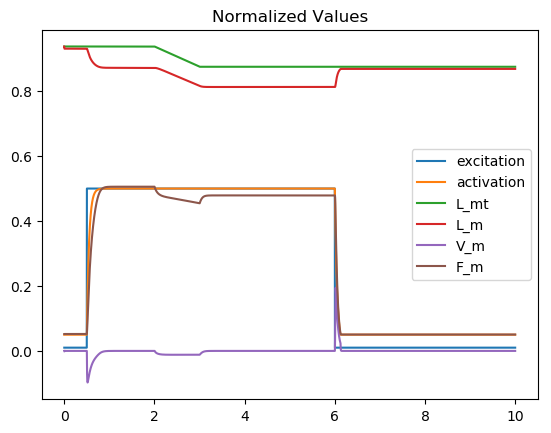

PyObject <matplotlib.text.Text object at 0x7f398255d860>

In [103]:
#parameters
centis = 10.0^-2
TAU = 0.05 
BETA = 1
L0 = 8*centis # optimal length of muscle
F0 = 30
V_MAX = 5*L0
L_ST = 4*L0 # length of slack tendon
MAX_STRAIN = 0.0325
K_SP = 20/centis
K_T = F0/(MAX_STRAIN*L_ST)
L_MT = 39.5*centis
V_MT = 0
L_LOAD = 5*centis
L_TOT = 44.5*centis

include("Musclesim.jl")
include("jules/jules.jl")
ms = MuscleSim
js = Jules

start = 0
fin = 10
dt = 0.001
time = collect(start:dt:fin)

ramp = t -> t/9 + 0.01;

(model, external_model) = ms.CreateModel(
    start_time = start,
    end_time = fin,
    dt = dt,
    tau = TAU,
    beta = BETA,
    V_max = V_MAX,
    F_max = F0,
    L_optimal = L0,
    L_mt_initial = L_MT,
    K_t = K_T,
    K_sp = K_SP,
    L_st = L_ST,
    L_total = L_TOT,
    L_load = L_LOAD,
    activ_lower_bound = 0.05,
    activ_upper_bound = 1.0,
    excitation_func=ms.excite)

output = ms.simulateExternal(model, external_model)
#plot(model.time, model.excitation)
#plot(model.time, model.activation)

index = 1:length(output.time) -1
function plotOutput(output, index)
    plot(output.time[index], output.excitation[index], label="excitation")
    plot(output.time[index], output.activation[index], label="activation")
    plot(output.time[index], output.L_mt[index], label="L_mt")
    plot(output.time[index], output.L_m[index], label="L_m")
    plot(output.time[index], output.L_t[index], label="L_t")
    plot(output.time[index], output.V_mt[index], label="V_mt")
    plot(output.time[index], output.F_m[index], label="F_m")
    legend()
end

function plotOutputNormalized(output, index)
    plot(output.time[index], output.excitation[index], label="excitation")
    plot(output.time[index], output.activation[index], label="activation")
    plot(output.time[index], (output.L_mt[index] - model.L_st)/model.L_optimal, label="L_mt")
    plot(output.time[index], output.L_m[index]/model.L_optimal, label="L_m")
    #plot(output.time[index], output.V_mt[index], label="V_mt")
    plot(output.time[index], output.V_m[index]/model.V_max, label="V_m")
    plot(output.time[index], output.F_m[index]/model.F_max, label="F_m")
    legend()
    title("Normalized Values")
end

plotOutputNormalized(output, index)

#output.activation[index]
#Kplot(model.time, model.activation)
#plot(time, b[1:length(time)])



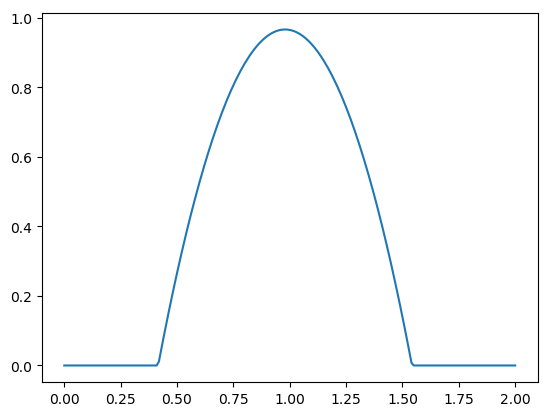

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f7a7f248278>

In [12]:
#plot(model.time, model.K_t)
#add slack length of the load
#integrate until F_m settles for initial value
#let integrations go for a little while to allow errors to settle
#calculate a(t) every iteration

#=
array = collect(-0:0.01:2)
out = map(ms.norm_length_tension, array)
plot(array,  out)
=#

#js.interp(out, array, 0.0)
#plot(array,out)

$$
\begin{aligned}
F_m &= F_t                         \\
\dot{F}_m &= \dot{F}_t             \\
F_t &= K_t(L_t - L_{st})           \\
F_m &= A\cdot FV(V_m)\cdot LT(L_m) \\
L_T &= L_{mt} - L_m                \\
\tilde{F}_m &= \frac{F_m}{F_0}     \\
\tilde{L}_m &= \frac{L_m}{L_0}     \\
\tilde{V}_m &= \frac{V_m}{V_{max}} \\
\dot{a}(t) &= \frac{u(t)-a(t)}{\tau} \\
\dot{a}(t) &= \frac{u(t) - (\beta + (1 - \beta) u(t)) a(t)}{\tau} \\
\varepsilon &= \frac{L_t - L_{st}}{L_{st}} \\
LT\left(\frac{L}{L_0}\right) &= -3.0508\cdot \left(\frac{L}{L_0}\right)^2 + 5.9758\cdot \left(\frac{L}{L_0}\right) - 1.9597, 0.42 \le \frac{L}{L_0}\le1.54 \\
K_t &= \frac{F_0}{\varepsilon_{max}L_{st}} \\
\tilde{V}_m &= 0.995242\cdot e^{13.8817(F\tilde{V}-1.39214)} - 0.996815\cdot e^{-3.91442 F\tilde{V}} \\
\dot{F}_t &= K_t (V_{mt} - V_m) \\
V_m &= V_{max} \cdot FV^{-1} \left(\frac{F_m}{F_0 \cdot a \cdot LT(\tilde{L}_m)}\right)
\end{aligned}
$$

$L_{st}$ is the length of the slack tendon.
$a$ is muscle activation
$u$ is neural excitation
$\tau$ is time constant
$\varepsilon$ is tendon strain.

In [4]:
r = collect(5:3:38)
r[length(r)]

38

In [5]:
temp = collect(-2:0.001:1.5)

temp = map(x -> (x, ms.norm_inv_fv(x)), temp)

temp = filter(x -> x[2] < 1, temp)

3393-element Array{Tuple{Float64,Float64},1}:
 (-2.0, -0.9968)  
 (-1.999, -0.9968)
 (-1.998, -0.9968)
 (-1.997, -0.9968)
 (-1.996, -0.9968)
 (-1.995, -0.9968)
 (-1.994, -0.9968)
 (-1.993, -0.9968)
 (-1.992, -0.9968)
 (-1.991, -0.9968)
 (-1.99, -0.9968) 
 (-1.989, -0.9968)
 (-1.988, -0.9968)
 ⋮                
 (1.381, 0.848169)
 (1.382, 0.860106)
 (1.383, 0.872208)
 (1.384, 0.88448) 
 (1.385, 0.896923)
 (1.386, 0.909539)
 (1.387, 0.922332)
 (1.388, 0.935303)
 (1.389, 0.948455)
 (1.39, 0.96179)  
 (1.391, 0.975312)
 (1.392, 0.989022)

In [15]:
?constrain


search:

Couldn't find constrain
Perhaps you meant contains or const


No documentation found.

Binding `constrain` does not exist.
